<a href="https://colab.research.google.com/github/wahyukusuma/singleaccelerometer/blob/master/ActivityRecognitionPy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
#
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [0]:
from sklearn.utils import shuffle

train = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/train.csv")
test = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/test.csv")

train = shuffle(train)
test = shuffle(test)

display(train.head())

print (train.shape)
print "\n"
#print (test.shape)

subject_training_data = train['subject']
subject_testing_data = test['subject']

training_labels = train['Activity']
testing_labels = test['Activity']

train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

print "Training data consists of {} instances of data with {} total features".format(train.shape[0], train.shape[1])
print "Training data includes value counts of\n", training_labels.value_counts()
print "\n"
print "Testing data consists of {} instances of data".format(test.shape[0])
print "Testing data includes value counts of\n", testing_labels.value_counts()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
6722,0.280079,-0.016785,-0.106778,-0.992867,-0.996748,-0.994522,-0.993684,-0.995866,-0.993251,-0.934631,-0.574576,-0.823855,0.844710,0.695161,0.846320,-0.995640,-0.999943,-0.999985,-0.999912,-0.995391,-0.995390,-0.990974,-0.507579,-0.727343,-0.583972,0.222803,-0.056764,0.008335,0.545013,0.345691,-0.084744,0.111144,0.052284,0.251542,-0.123110,0.169189,0.146161,-0.355311,0.348838,-0.231444,...,-1.000000,-1.000000,0.780694,-0.724467,-0.905143,-0.999100,-0.999195,-0.999093,-0.999025,-0.996036,-0.999100,-0.999997,-0.997986,-1.000000,-0.384615,0.557470,-0.743792,-0.921908,-0.998792,-0.999159,-0.998933,-0.999464,-0.995289,-0.998792,-0.999997,-0.997701,-1.000000,-0.809524,0.571238,-0.832545,-0.956456,-0.470313,0.358420,0.132021,-0.441379,0.466688,-0.564081,-0.428795,29,LAYING
1276,0.188511,0.014950,-0.202382,0.330769,0.376524,0.007636,0.229313,0.262276,-0.090284,0.660692,0.123927,-0.048204,-0.010846,-0.250245,-0.232545,0.315926,-0.113380,-0.633595,-0.532036,-0.057041,-0.244185,-0.258333,0.263681,0.448676,-0.050068,-0.369307,0.193191,0.069211,0.031321,-0.208604,0.127223,0.304608,-0.178698,0.357334,-0.051167,0.256231,0.060335,-0.430298,-0.405115,-0.108476,...,0.729523,-0.904762,-0.046891,-0.017345,-0.420449,0.452813,0.006398,0.178649,-0.047130,-0.586553,0.452813,-0.100799,0.368971,0.961622,-1.000000,0.304412,-0.507687,-0.739309,0.305978,0.250225,0.475972,0.100566,0.458397,0.305978,-0.124165,0.695502,0.833070,-0.904762,0.013893,-0.327195,-0.688332,0.368833,0.834706,0.979313,-0.393696,-0.781485,0.249071,0.023257,6,WALKING_DOWNSTAIRS
513,0.274418,-0.056770,-0.176353,-0.234709,0.008737,-0.358949,-0.327013,0.034456,-0.308936,-0.126466,-0.182806,-0.432165,0.018399,0.060188,0.554174,-0.140620,-0.705902,-0.800364,-0.805652,-0.491915,-0.142606,-0.217188,0.747397,0.258514,-0.101996,-0.507065,0.385127,-0.266034,0.282301,-0.239358,0.219079,0.001833,0.013659,-0.340148,0.207397,0.048046,-0.229311,-0.676549,-0.211240,0.086378,...,0.329375,-0.936508,0.039567,-0.737619,-0.961814,-0.408400,-0.234816,-0.229759,-0.212073,-0.773878,-0.408400,-0.693468,-0.310399,0.343696,-1.00

(7352, 563)


Training data consists of 7352 instances of data with 561 total features
Training data includes value counts of
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


Testing data consists of 2947 instances of data
Testing data includes value counts of
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64


In [0]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(train.select_dtypes(include=numerics).columns)
X_train = train#[numerical_vars]
X_train.shape
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
6722,0.280079,-0.016785,-0.106778,-0.992867,-0.996748,-0.994522,-0.993684,-0.995866,-0.993251,-0.934631,-0.574576,-0.823855,0.844710,0.695161,0.846320,-0.995640,-0.999943,-0.999985,-0.999912,-0.995391,-0.995390,-0.990974,-0.507579,-0.727343,-0.583972,0.222803,-0.056764,0.008335,0.545013,0.345691,-0.084744,0.111144,0.052284,0.251542,-0.123110,0.169189,0.146161,-0.355311,0.348838,-0.231444,...,-0.999945,-0.999268,-1.000000,-1.000000,0.780694,-0.724467,-0.905143,-0.999100,-0.999195,-0.999093,-0.999025,-0.996036,-0.999100,-0.999997,-0.997986,-1.000000,-0.384615,0.557470,-0.743792,-0.921908,-0.998792,-0.999159,-0.998933,-0.999464,-0.995289,-0.998792,-0.999997,-0.997701,-1.000000,-0.809524,0.571238,-0.832545,-0.956456,-0.470313,0.358420,0.132021,-0.441379,0.466688,-0.564081,-0.428795
1276,0.188511,0.014950,-0.202382,0.330769,0.376524,0.007636,0.229313,0.262276,-0.090284,0.660692,0.123927,-0.048204,-0.010846,-0.250245,-0.232545,0.315926,-0.113380,-0.633595,-0.532036,-0.057041,-0.244185,-0.258333,0.263681,0.448676,-0.050068,-0.369307,0.193191,0.069211,0.031321,-0.208604,0.127223,0.304608,-0.178698,0.357334,-0.051167,0.256231,0.060335,-0.430298,-0.405115,-0.108476,...,-0.097586,0.007725,0.729523,-0.904762,-0.046891,-0.017345,-0.420449,0.452813,0.006398,0.178649,-0.047130,-0.586553,0.452813,-0.100799,0.368971,0.961622,-1.000000,0.304412,-0.507687,-0.739309,0.305978,0.250225,0.475972,0.100566,0.458397,0.305978,-0.124165,0.695502,0.833070,-0.904762,0.013893,-0.327195,-0.688332,0.368833,0.834706,0.979313,-0.393696,-0.781485,0.249071,0.023257
513,0.274418,-0.056770,-0.176353,-0.234709,0.008737,-0.358949,-0.327013,0.034456,-0.308936,-0.126466,-0.182806,-0.432165,0.018399,0.060188,0.554174,-0.140620,-0.705902,-0.800364,-0.805652,-0.491915,-0.142606,-0.217188,0.747397,0.258514,-0.101996,-0.507065,0.385127,-0.266034,0.282301,-0.239358,0.219079,0.001833,0.013659,-0.340148,0.207397,0.048046,-0.229311,-0.676549,-0.211240,0.086378,...,-0.821764,-0.271312,0.329375,-0.936508,0.039567,-0.737619,-0.961814,-0.408400,-0.234816,-0.22975

In [0]:
numerical_vars = list(test.select_dtypes(include=numerics).columns)
X_test = test#[numerical_vars]
X_test.shape
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
607,0.230884,-0.025105,-0.070413,-0.220075,0.016590,-0.303859,-0.321656,-0.040092,-0.277169,0.074841,-0.088417,-0.341726,0.087020,-0.130093,0.620084,-0.156191,-0.694175,-0.800033,-0.777618,-0.452105,-0.350155,-0.373834,0.272752,0.344746,0.022570,-0.551987,0.420271,-0.203185,0.138490,-0.073992,0.139780,-0.073769,0.254650,-0.153849,0.104898,-0.186883,0.161897,-0.235642,0.223419,-0.158183,...,-0.825147,-0.401325,0.213653,-0.904762,-0.095555,0.013900,-0.307079,-0.620463,-0.694519,-0.637867,-0.754233,-0.974614,-0.620463,-0.928642,-0.594987,0.465490,-0.846154,0.096078,-0.556867,-0.834715,-0.716538,-0.748557,-0.724353,-0.742366,-0.827945,-0.716538,-0.960560,-0.690464,0.223908,-0.904762,0.167088,-0.117710,-0.429779,0.315332,-0.067095,-0.444474,-0.875698,-0.783174,0.237004,-0.040316
1465,0.205415,0.001343,-0.108980,-0.075056,0.008141,-0.542362,-0.150383,-0.021863,-0.527985,0.444512,-0.126890,-0.382929,-0.183794,0.033577,0.572756,-0.112386,-0.570186,-0.802808,-0.902526,-0.269731,-0.325195,-0.502662,0.370912,0.444219,0.063258,-0.563445,0.566306,-0.359691,0.212420,-0.156269,0.238205,0.007133,-0.021211,-0.092464,0.190278,-0.141326,-0.036512,-0.227832,-0.495456,0.053939,...,-0.511992,-0.198546,0.522536,-0.873016,-0.015847,-0.014737,-0.412000,-0.368026,-0.460238,-0.343119,-0.589695,-0.800623,-0.368026,-0.791362,-0.229806,0.634851,-0.333333,0.115473,-0.579108,-0.851713,-0.494023,-0.578348,-0.530439,-0.655356,-0.565532,-0.494023,-0.881007,-0.570463,0.423669,-0.873016,0.295220,-0.324554,-0.700827,0.740222,0.015861,0.897915,0.514018,-0.844588,0.203528,0.039687
1230,0.295573,-0.011682,-0.125010,-0.993026,-0.989310,-0.951979,-0.994155,-0.989030,-0.949167,-0.927900,-0.561139,-0.808258,0.852844,0.692907,0.818969,-0.975053,-0.999881,-0.999884,-0.997896,-0.995330,-0.991121,-0.947706,-0.273743,-0.471785,-0.495126,0.089140,0.019656,0.009236,-0.242591,0.300790,-0.196922,0.207173,-0.171547,0.111862,-0.093383,0.207639,-0.446492,-0.499209,-0.510885,0.415880,...,-0.999826,-0.984810,-1.000000,-0.936508,0.336339,-0.518298,-0.822248,-0.959999

In [0]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
enc_training_labels = le.transform(training_labels)
enc_testing_labels = le.transform(testing_labels)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xt = ExtraTreesClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=0)
svc = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[dt, rf, xt, kn, lr, svc],
                              weights=[2, 1, 1, 1, 1, 1], voting='soft')

def evaluateclf(clf):
    scores = cross_val_score(clf, X_train, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

print "Decision Tree {}".format(evaluateclf(dt))
print "Random Forest {}".format(evaluateclf(rf))
print "Extra Trees {}".format(evaluateclf(xt))
print "K Neighbors {}".format(evaluateclf(kn))
print "Logistic Regression {}".format(evaluateclf(lr))
print "SVC {}".format(evaluateclf(svc))
print "EnsembleVoteClassifier {}".format(evaluateclf(eclf))

Decision Tree performances: [0.93841762 0.93270799 0.93872549], 
Average: 0.936617033981
Random Forest performances: [0.97226754 0.96818923 0.96446078], 
Average: 0.968305851432
Extra Trees performances: [0.97145188 0.96615008 0.96323529], 
Average: 0.966945750568
K Neighbors performances: [0.96696574 0.96288744 0.95955882], 
Average: 0.963137334869
Logistic Regression performances: [0.98572594 0.98205546 0.98325163], 
Average: 0.983677678974
SVC performances: [0.94535073 0.94004894 0.93300654], 
Average: 0.939468736561
EnsembleVoteClassifier performances: [0.98205546 0.97471452 0.9746732 ], 
Average: 0.977147728767


In [0]:
import sklearn.metrics as met
def model_build(model):
    model.fit(X_train, enc_training_labels)
    return model

# helper function to handle evaluation
def model_eval(model):
    pred = model.predict(X_test)
    print 'Accuracy:\n-----------------------------'
    print met.accuracy_score(enc_testing_labels, pred)
    print '\nConfusion Matrix:\n-----------------------------'
    print met.confusion_matrix(enc_testing_labels, pred)
    print '\nClassification Report:\n-----------------------------'
    print met.classification_report(enc_testing_labels, pred)

In [0]:
set(enc_training_labels) - set(enc_testing_labels)

set()

In [0]:
knn = model_build(KNeighborsClassifier())
model_eval(knn)

In [0]:
print 'DecisionTreeClassifier:\n-----------------------------'
dt = model_build(dt)
model_eval(dt)
print 'RandomForestClassifier:\n-----------------------------'
rf = model_build(rf)
model_eval(rf)
print 'ExtraTreesClassifier:\n-----------------------------'
xt = model_build(xt)
model_eval(xt)
print 'KNeighborsClassifier:\n-----------------------------'
knn = model_build(kn)
model_eval(knn)
print 'LogisticRegression:\n-----------------------------'
lr = model_build(lr)
model_eval(lr)
print 'SVC\n-----------------------------'
svc = model_build(svc)
model_eval(svc)
print 'EnsembleVoteClassifier:\n-----------------------------'
eclf = model_build(eclf)
model_eval(eclf)


DecisionTreeClassifier:
-----------------------------
Accuracy:
-----------------------------
0.8676620291822192

Confusion Matrix:
-----------------------------
[[537   0   0   0   0   0]
 [  0 375 116   0   0   0]
 [  0  76 456   0   0   0]
 [  0   0   0 462  23  11]
 [  0   0   0  15 356  49]
 [  0   0   0  65  35 371]]

Classification Report:
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.83      0.76      0.80       491
           2       0.80      0.86      0.83       532
           3       0.85      0.93      0.89       496
           4       0.86      0.85      0.85       420
           5       0.86      0.79      0.82       471

   micro avg       0.87      0.87      0.87      2947
   macro avg       0.87      0.86      0.86      2947
weighted avg       0.87      0.87      0.87      2947

RandomForestClassifier:
-----------------------------
Accuracy:
--------------

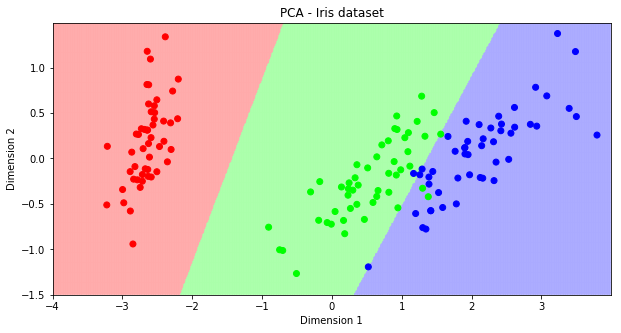

In [0]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
h = .01
x_min, x_max = -4,4
y_min, y_max = -1.5,1.5
# loading dataset
data = load_iris()
X, y = data.data, data.target
# selecting first 2 components of PCA
X_pca = PCA().fit_transform(X)
X_selected = X_pca[:,:2]
# training classifier and evaluating on the whole plane
clf = SVC(kernel='linear')
clf.fit(X_selected,y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, alpha=.6,cmap=cmap_light)
plt.title('PCA - Iris dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0],X_pca[:,1],c=data.target,cmap=cmap_bold)
plt.show()

# **Test Feature Selection**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [0]:
train = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/train.csv")
test = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/test.csv")
train.shape
test.shape
train.head()
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [0]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(train.select_dtypes(include=numerics).columns)
train = train[numerical_vars]
train.shape
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.

In [0]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(test.select_dtypes(include=numerics).columns)
test = test[numerical_vars]
test.shape
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.921477,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.957178,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.978222,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.99766

In [0]:
scaler = StandardScaler()
scaler.fit(train.fillna(0))

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

## Select Feature with lasso (L1)

In [0]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(train.fillna(0)), enc_training_labels)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
sel_.get_support()

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [0]:
selected_feat = train.columns[(sel_.get_support())]
print('total features: {}'.format((train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 562
selected features: 501
features with coefficients shrank to zero: 1351


In [0]:
np.sum(sel_.estimator_.coef_ == 0)

1351

In [0]:
removed_feats = train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

In [0]:
X_train_selected = sel_.transform(train.fillna(0))
X_test_selected = sel_.transform(test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((7352, 501), (2947, 501))

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xt = ExtraTreesClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=0)
svc = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[dt, rf, xt, kn, lr, svc],
                              weights=[2, 1, 1, 1, 1, 1], voting='soft')

def evaluateclf(clf):
    scores = cross_val_score(clf, X_train_selected, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

print "Decision Tree {}".format(evaluateclf(dt))
print "Random Forest {}".format(evaluateclf(rf))
print "Extra Trees {}".format(evaluateclf(xt))
print "K Neighbors {}".format(evaluateclf(kn))
print "Logistic Regression {}".format(evaluateclf(lr))
print "SVC {}".format(evaluateclf(svc))
print "EnsembleVoteClassifier {}".format(evaluateclf(eclf))

Decision Tree performances: [0.15375204 0.15905383 0.18014706], 
Average: 0.16431764386
Random Forest performances: [0.16680261 0.18352365 0.17606209], 
Average: 0.175462785259
Extra Trees performances: [0.17169657 0.1680261  0.17973856], 
Average: 0.17315374582
K Neighbors performances: [0.15742251 0.16435563 0.18178105], 
Average: 0.167853062015
Logistic Regression performances: [0.17414356 0.16231648 0.18504902], 
Average: 0.173836350745
SVC performances: [0.1908646  0.18841762 0.18218954], 
Average: 0.187157253694
EnsembleVoteClassifier performances: [0.15497553 0.15783034 0.19035948], 
Average: 0.167721783294


## Select Feature with ridge (L2)

In [0]:
train = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/train.csv")
test = pd.read_csv("drive/My Drive/1HumanActivity/HAPT/test.csv")
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(train.select_dtypes(include=numerics).columns)
X_train = train[numerical_vars]
X_train.shape
X_train.head()
numerical_vars = list(test.select_dtypes(include=numerics).columns)
X_test = test[numerical_vars]
X_test.shape
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.921477,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.957178,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.978222,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.99766

In [0]:
l1_logit = LogisticRegression(C=1, penalty='l2')
l1_logit.fit(scaler.transform(X_train.fillna(0)), enc_training_labels)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
sel_.get_support()

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [0]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 562
selected features: 501
features with coefficients shrank to zero: 1351


In [0]:
np.sum(sel_.estimator_.coef_ == 0)

1351

In [0]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

236

In [0]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

In [0]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((7352, 501), (2947, 501))

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xt = ExtraTreesClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=0)
svc = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[dt, rf, xt, kn, lr, svc],
                              weights=[2, 1, 1, 1, 1, 1], voting='soft')

def evaluateclf(clf):
    scores = cross_val_score(clf, X_train_selected, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

print "Decision Tree {}".format(evaluateclf(dt))
print "Random Forest {}".format(evaluateclf(rf))
print "Extra Trees {}".format(evaluateclf(xt))
print "K Neighbors {}".format(evaluateclf(kn))
print "Logistic Regression {}".format(evaluateclf(lr))
print "SVC {}".format(evaluateclf(svc))
print "EnsembleVoteClassifier {}".format(evaluateclf(eclf))

Decision Tree performances: [0.15212072 0.17006525 0.18586601], 
Average: 0.169350661236
Random Forest performances: [0.18964111 0.158646   0.16748366], 
Average: 0.171923590897
Extra Trees performances: [0.18760196 0.17699837 0.17034314], 
Average: 0.17831448784
K Neighbors performances: [0.15742251 0.16435563 0.18178105], 
Average: 0.167853062015
Logistic Regression performances: [0.17414356 0.16231648 0.18504902], 
Average: 0.173836350745
SVC performances: [0.1908646  0.18841762 0.18218954], 
Average: 0.187157253694
EnsembleVoteClassifier performances: [0.15946166 0.16190865 0.18464052], 
Average: 0.168670277609


## Select Feature with Random Forest

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [0]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(train.select_dtypes(include=numerics).columns)
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)
X_train = train#[numerical_vars]
X_train.shape
X_train.head()
numerical_vars = list(test.select_dtypes(include=numerics).columns)
X_test = test#[numerical_vars]
X_test.shape
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.993471,-0.921477,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.997610,-0.957178,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.999269,-0.978222,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-

In [0]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, enc_training_labels)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

238

In [0]:
print(selected_feat)

Index([u'tBodyAcc-mean()-X', u'tBodyAcc-mean()-Y', u'tBodyAcc-mean()-Z',
       u'tBodyAcc-max()-Y', u'tBodyAcc-iqr()-Z', u'tBodyAcc-entropy()-X',
       u'tBodyAcc-entropy()-Y', u'tBodyAcc-entropy()-Z',
       u'tBodyAcc-arCoeff()-X,1', u'tBodyAcc-arCoeff()-X,2',
       ...
       u'fBodyBodyGyroJerkMag-meanFreq()', u'fBodyBodyGyroJerkMag-skewness()',
       u'fBodyBodyGyroJerkMag-kurtosis()', u'angle(tBodyAccMean,gravity)',
       u'angle(tBodyAccJerkMean),gravityMean)',
       u'angle(tBodyGyroMean,gravityMean)',
       u'angle(tBodyGyroJerkMean,gravityMean)', u'angle(X,gravityMean)',
       u'angle(Y,gravityMean)', u'angle(Z,gravityMean)'],
      dtype='object', length=238)


In [0]:
#pd.series(sel.estimator_,feature_importances_,ravel()).hist()

In [0]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

In [0]:
columnsData = X_train.loc[ : , selected_feat]

In [0]:
columnsData.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-max()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,...,fBodyGyro-meanFreq()-X,fBodyGyro-meanFreq()-Y,fBodyGyro-meanFreq()-Z,fBodyGyro-skewness()-X,fBodyGyro-kurtosis()-X,fBodyGyro-skewness()-Y,fBodyGyro-kurtosis()-Y,fBodyGyro-skewness()-Z,fBodyGyro-kurtosis()-Z,"fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64","fBodyGyro-bandsEnergy()-49,64","fBodyGyro-bandsEnergy()-49,56.1","fBodyGyro-bandsEnergy()-57,64.1","fBodyGyro-bandsEnergy()-49,56.2","fBodyGyro-bandsEnergy()-57,64.2","fBodyGyro-bandsEnergy()-49,64.2",fBodyAccMag-min(),fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.567378,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.375426,0.899469,...,-0.257549,0.097947,0.547151,0.377311,0.134092,0.273372,-0.091262,-0.484347,-0.782851,-0.999929,-0.999985,-0.999954,-0.998346,-0.998961,-0.999072,-0.999928,-0.999444,-0.925722,-0.088436,-0.436471,-0.796840,-0.988175,0.346989,-0.516080,-0.802760,-0.989498,-0.128989,0.586156,0.374605,-0.991048,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.557851,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,-0.161343,0.122586,0.984520,-0.114893,0.102764,-0.383430,0.907829,...,-0.048167,-0.401608,-0.068178,-0.458553,-0.797014,0.387569,0.148665,-0.156909,-0.451776,-0.999784,-0.999782,-0.999783,-0.999980,-0.999990,-0.999961,-0.999983,-0.999971,-0.986911,-0.044150,-0.122040,-0.449522,-0.989549,0.532061,-0.624871,-0.900160,-0.991829,-0.271958,-0.336310,-0.720015,-0.994440,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.557851,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,-0.999635,-0.992605,-0.992934,0.892401,-0.163711,0.094566,0.986770,-0.114893,0.102764,-0.401602,0.908668,...,-0.216685,-0.017264,-0.110720,0.090519

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xt = ExtraTreesClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=0)
svc = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[dt, rf, xt, kn, lr, svc],
                              weights=[2, 1, 1, 1, 1, 1], voting='soft')

def evaluateclf(clf):
    scores = cross_val_score(clf, columnsData, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

print "Decision Tree {}".format(evaluateclf(dt))
print "Random Forest {}".format(evaluateclf(rf))
print "Extra Trees {}".format(evaluateclf(xt))
print "K Neighbors {}".format(evaluateclf(kn))
print "Logistic Regression {}".format(evaluateclf(lr))
print "SVC {}".format(evaluateclf(svc))
print "EnsembleVoteClassifier {}".format(evaluateclf(eclf))

Decision Tree performances: [0.17292007 0.17659054 0.17769608], 
Average: 0.175735560673
Random Forest performances: [0.17088091 0.18433931 0.19321895], 
Average: 0.182813060878
Extra Trees performances: [0.16557912 0.16353997 0.16911765], 
Average: 0.166078911173
K Neighbors performances: [0.18066884 0.16721044 0.17034314], 
Average: 0.172740806491
Logistic Regression performances: [0.18066884 0.16598695 0.17687908], 
Average: 0.174511625386
SVC performances: [0.19249592 0.18760196 0.18954248], 
Average: 0.189880120981
EnsembleVoteClassifier performances: [0.17659054 0.17577488 0.17728758], 
Average: 0.176550999229
